In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

### How many years have been "Batman years", with more Batman characters than Superman characters?

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

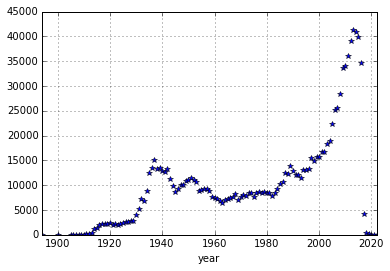

In [16]:
c = cast
g = c.groupby(['type', 'year']).size()
g = g.unstack('type').fillna(0)
(g.actor - g.actress).plot(style='*');

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

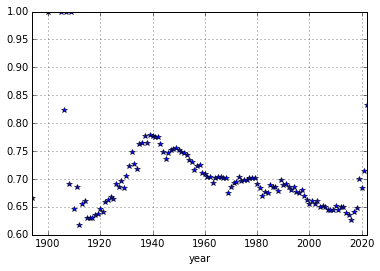

In [17]:
c = cast
g = c.groupby(['type', 'year']).size()
g = g.unstack('type').fillna(0)
(g.actor / (g.actor + g.actress)).plot(style='*');

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

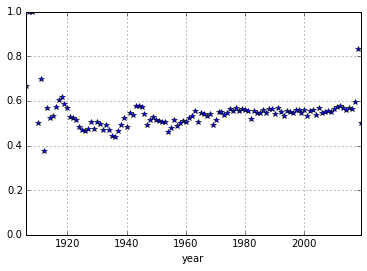

In [19]:
c = cast[cast.n == 2]
g = c.groupby(['type', 'year']).size()
g = g.unstack('type').fillna(0)
(g.actor / (g.actor + g.actress)).plot(style='*',
                                      ylim=[0, 1]);

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

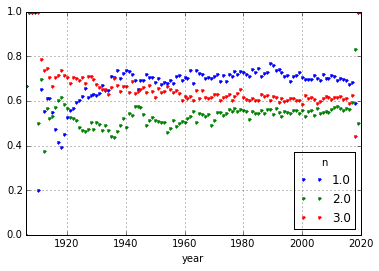

In [29]:
c = cast[cast.n <= 3]
g = c.groupby(['type', 'year', 'n']).size()
g = g.unstack('type').fillna(0)
(g.actor / (g.actor + g.actress)).unstack('n').\
    plot(style='.', ylim=[0, 1]);